In [7]:
import pyaudio
import wave
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import pylab

In [3]:
# This records an audio file
CHUNK = 512
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 1
RATE = 44100 #sample rate
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "pyaudio-output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [9]:
#open a wav format music and play it
f = wave.open(r"file.wav","rb")  
#instantiate PyAudio  
p = pyaudio.PyAudio()  
#open stream  
stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                channels = f.getnchannels(),  
                rate = f.getframerate(),  
                output = True)  
#read data  
data = f.readframes(CHUNK)  

#play stream wav file 
while data:  
    stream.write(data)  
    data = f.readframes(CHUNK)  

#stop stream  
stream.stop_stream()  
stream.close()  

#close PyAudio  
p.terminate()  

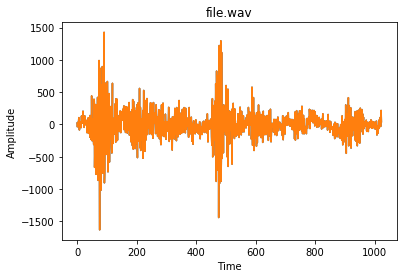

In [12]:
# Plot amps over time
# read audio samples
input_data = read("file.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:1024])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("file.wav")
# display the plot
plt.show()

In [4]:
print(audio.shape)

(220160, 2)


In [5]:
print(audio[0:1,0])

[22]


/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


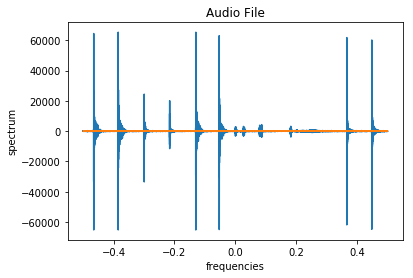

In [26]:
# Plot Spectrum over Freq
spectrum = np.fft.fft(audio)
frequencies = np.fft.fftfreq(len(spectrum))
pylab.plot(frequencies,spectrum)
pylab.xlabel('frequencies')
pylab.ylabel('spectrum')
pylab.title('Audio File')
pylab.show()

In [21]:
print(frequencies.shape)

(220160,)


In [ ]:
#To Do
#Is frequency the metric for identifying if an audio clip has sound or is silent
#Set threshold
#if frequency is > threshold 
#the their is noise and we want to print("True") and return 